In [61]:
import numpy as np
import pandas as pd

In [62]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
df.shape

(10000, 14)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df["Exited"].value_counts(dropna=False)

,count
Exited,
0,7963
1,2037


In [67]:
df["Geography"].value_counts(dropna=False)

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [68]:
df.sample()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5658,5659,15814430,Ma,747,Spain,Male,41,9,0.0,1,1,0,32430.94,1


In [69]:
df.drop(columns={"RowNumber","CustomerId","Surname"},inplace=True)
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1868,656,France,Male,36,8,97786.08,2,0,1,21478.36,0


In [70]:
df = pd.get_dummies(df, columns=["Geography","Gender"], drop_first=True)
df.sample()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
936,775,52,8,109922.61,1,1,1,96823.32,1,False,False,True


In [71]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [72]:
df.sample()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
5310,622,42,9,115766.26,1,0,0,72155.85,1,1,0,1


In [73]:
X=df.drop(columns=["Exited"])
y=df["Exited"]

In [74]:
from  sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler=StandardScaler()

In [79]:
xtrain_scaled=scaler.fit_transform(x_train)
xtest_scaled=scaler.transform(x_test)

In [80]:
xtrain_scaled[:10]

array([[ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
         0.64920267,  0.97481699,  1.36766974, -0.57946723, -0.57638802,
         0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 ,  0.69683765,  0.80843615,
         0.64920267,  0.97481699,  1.6612541 ,  1.72572313, -0.57638802,
         0.91324755],
       [-0.96147213, -1.41636539, -0.69539349,  0.61862909, -0.91668767,
         0.64920267, -1.02583358, -0.25280688, -0.57946723,  1.73494238,
         0.91324755],
       [-0.94071667, -1.13114808,  1.38675281,  0.95321202, -0.91668767,
         0.64920267, -1.02583358,  0.91539272, -0.57946723, -0.57638802,
        -1.09499335],
       [-1.39733684,  1.62595257,  1.38675281,  1.05744869, -0.91668767,
        -1.54035103, -1.02583358, -1.05960019, -0.57946723, -0.57638802,
         0.91324755],
       [-0.85769482,  0.19986603, -0.3483691 ,  0.7067467 , -0.91668767,
         0.64920267, -1.02583358,  1.09047006, -0.57946723, -0.57638802,
         0.913

In [81]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [82]:
df.columns,len(df.columns)-1

(Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
        'Geography_Spain', 'Gender_Male'],
       dtype='object'),
 11)

In [83]:
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=11))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
# 11 input  then 3 perceptron  then 1 perceptron as output

In [85]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [86]:
# total trainable parameters =40
# 11*3+3   +  3*1+1    = 36 + 4 = 40
#  11 input* 3 hidden layer nodes(weight combo) + 3 bias of hidden layer nodes   +
    # 3 i/p*1(node weight combo (weight lines))+ 1 bias of output
#  so total weights and biases

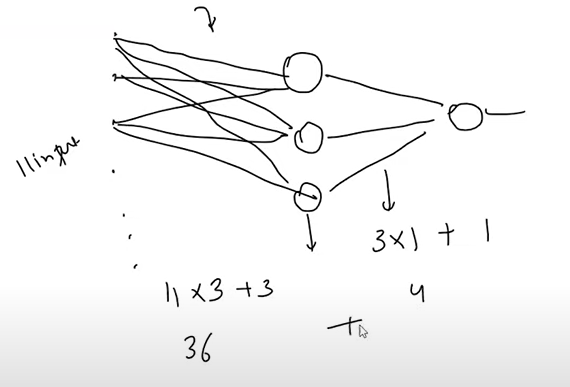

this is a binary classification problem -> churn or not churn

In [87]:
model.compile(loss="binary_crossentropy",optimizer="Adam")

In [88]:
model.fit(xtrain_scaled,y_train,epochs=15)

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7870
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5862  
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5119  
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4818
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4612
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4554
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4385
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4489
Epoch 9/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4354
Epoch 10/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4427
Epoch 11/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4315
Epoch 12/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4273
Epoch 13/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4338
Epoch 14/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4291
Epoch 15/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

In [89]:
model.layers[0].get_weights()

[array([[-0.11186618,  0.14384013,  0.06782847],
        [ 0.26913598, -1.7736164 ,  0.37403408],
        [-0.02835791,  0.07113745, -0.0113183 ],
        [-0.3035709 , -0.21002512,  0.29338753],
        [-2.2406034 , -0.11758135,  0.06948146],
        [-0.16653262, -0.10560759, -0.17378183],
        [-0.6260459 ,  0.43953004, -0.91669124],
        [-0.02762022,  0.01180951,  0.06395049],
        [ 0.26486143, -0.35241556,  0.81149954],
        [ 0.0126607 , -0.06722996, -0.0466865 ],
        [-0.03878392,  0.40309933, -0.38190067]], dtype=float32),
 array([-0.8585108 ,  0.5772157 , -0.60111964], dtype=float32)]

11*3 weights  and 3 biases 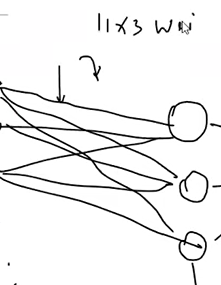

```
[array([[ 0.05468355, -0.07724504,  0.05694767],
        [-2.9834743 , -0.14791046, -0.34129453],
        [-0.08267717, -0.06466804,  0.16863807],
        [ 0.02826145, -0.67871094, -0.5832557 ],
        [-0.42282787, -2.7414236 , -0.760397  ],
        [-0.08779113,  0.00776011,  0.07604707],
        [-0.22725989, -0.5595423 ,  1.0058796 ],
        [ 0.1931099 ,  0.0494226 , -0.14272891],
        [-0.08207075,  0.5225771 , -0.6011685 ],
        [ 0.01559788, -0.08347429, -0.13981514],
        [ 0.12620312, -0.05215465,  0.5434171 ]], dtype=float32),
 array([ 0.27259952, -1.1664834 ,  0.6591004 ], dtype=float32)]
 ```

In [90]:
model.layers[1].get_weights()

[array([[ 0.6059852],
        [-2.4181428],
        [ 0.8892993]], dtype=float32),
 array([-0.68024606], dtype=float32)]

3 weights and 1 bias

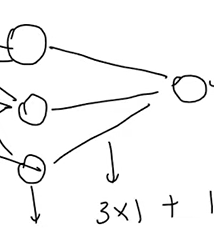

In [91]:
model.predict(xtest_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0.17012171],
       [0.09129502],
       [0.31823206],
       ...,
       [0.4156178 ],
       [0.09459336],
       [0.19014047]], dtype=float32)

In [92]:
y_temp_pred=model.predict(xtest_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step


In [93]:
np.where(y_temp_pred>0.5,1,0)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [94]:
ypred=np.where(y_temp_pred>0.5,1,0)

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
accuracy_score(y_test,ypred)

0.8215

In [97]:
model1=Sequential()
model1.add(Dense(11,activation="relu",input_dim=11))
model1.add(Dense(11,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
# 11 inputs(ie 11 i/p columns) then 11 perceptron in layer1 then 11 perceptron at layer2 then
#  1 perceptron as output

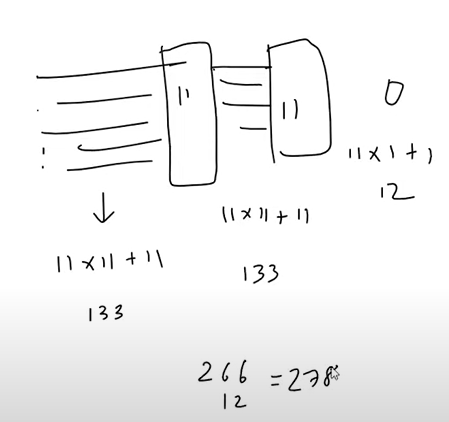

In [99]:
model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
model1.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [101]:
history=model1.fit(xtrain_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6748 - loss: 0.5951 - val_accuracy: 0.8125 - val_loss: 0.4533
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8014 - loss: 0.4547 - val_accuracy: 0.8200 - val_loss: 0.4265
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8114 - loss: 0.4331 - val_accuracy: 0.8181 - val_loss: 0.4155
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8145 - loss: 0.4255 - val_accuracy: 0.8275 - val_loss: 0.4046
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8203 - loss: 0.4136 - val_accuracy: 0.8331 - val_loss: 0.3945
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8442 - loss: 0.3804 - val_accuracy: 0.8419 - val_loss: 0.3847
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8384 - loss: 0.3823 - val_accuracy: 0.8431 - val_loss: 0.3785
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8420 - loss: 0.3687 - val_accu

In [102]:
import matplotlib.pyplot as plt

In [103]:
model1.layers[1].get_weights()

[array([[ 7.06945956e-02,  1.86610341e-01,  4.37623948e-01,
         -4.68724072e-01,  5.33280015e-01, -5.64443946e-01,
         -4.62424546e-01,  1.93755552e-01,  1.88682258e-01,
         -6.91094458e-01,  3.37564349e-01],
        [ 3.19970518e-01,  1.98592111e-01,  6.08575165e-01,
          4.14591432e-01,  3.26482266e-01, -9.10052583e-02,
          5.72980523e-01,  8.38074684e-02,  2.23634616e-02,
         -5.66408873e-01,  3.65237921e-01],
        [ 8.97513703e-02,  2.56771535e-01,  4.99396771e-01,
         -7.27391899e-01, -1.69917002e-01, -1.13544695e-01,
         -1.10168910e+00, -3.19906712e-01,  7.91836753e-02,
         -7.11286843e-01,  2.28864580e-01],
        [ 2.89835870e-01, -4.27557677e-02, -6.16414189e-01,
         -2.51937687e-01,  1.82251081e-01,  3.19821864e-01,
          3.46580036e-02, -2.35533100e-02,  4.72435623e-01,
          6.02738596e-02,  3.78585607e-01],
        [ 3.52694839e-01, -5.02975404e-01,  5.86297750e-01,
          1.23522490e-01,  3.40023279e-01,  

In [104]:
history.history

{'accuracy': [0.7493749856948853,
  0.8003125190734863,
  0.8092187643051147,
  0.8167187571525574,
  0.8246874809265137,
  0.83203125,
  0.8379687666893005,
  0.8415625095367432,
  0.8456249833106995,
  0.8471875190734863,
  0.8495312333106995,
  0.8504687547683716,
  0.8539062738418579,
  0.8557812571525574,
  0.8567187786102295,
  0.8579687476158142,
  0.8604687452316284,
  0.8604687452316284,
  0.858593761920929,
  0.8592187762260437,
  0.8606250286102295,
  0.8595312237739563,
  0.8606250286102295,
  0.8607812523841858,
  0.8607812523841858,
  0.8618749976158142,
  0.860156238079071,
  0.8639062643051147,
  0.8607812523841858,
  0.8606250286102295,
  0.8626562356948853,
  0.8634374737739563,
  0.8629687428474426,
  0.8628125190734863,
  0.8639062643051147,
  0.8639062643051147,
  0.8621875047683716,
  0.8639062643051147,
  0.8637499809265137,
  0.8629687428474426,
  0.8639062643051147,
  0.8634374737739563,
  0.8635937571525574,
  0.8639062643051147,
  0.8643749952316284,
  0.8648

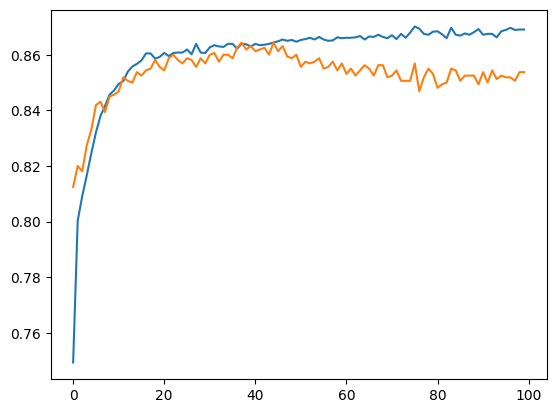

In [105]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

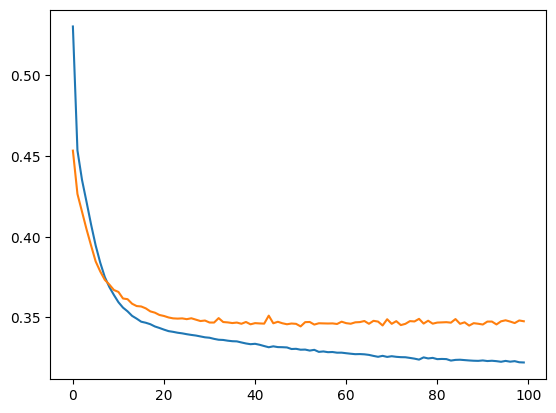

In [106]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])